<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/RNA/blob/main/Rede_neural_su_et_al.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Carregando o dataset
import numpy as np
import keras
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.initializers import Ones, Zeros, RandomUniform
from keras.metrics import MeanAbsolutePercentageError, MeanAbsoluteError, MeanRelativeError

df = pd.read_csv('data_cov.csv')

#Separando em entrada e saída
y = df['cov']
x = df.drop('cov', axis = 1)


In [ ]:
#Separando dados para treino e para teste da rede neural

x_treino = x[0:30:] ; x_teste = x[30:]
y_treino = y[0:30] ; y_teste = y[30:]
#print(x_treino)
scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

In [ ]:
#Para criar o modelo da rede precisamos usar o Sequential, do keras.models

modelo = Sequential()
modelo.add(tf.keras.layers.Input(shape=(x_treino_normalizado.shape[1],)))
#No paper de su é informado que ele inicia pelo número de camadas ocultas, com 10 neuronios/nos
#Começando uma análise com duas camadas ocultas

for i in range(11):
  modelo.add(Dense(units=40, activation='relu'))

#camaada de saída

modelo.add(Dense(units=1,activation = 'linear'))
modelo.compile(loss='mse', optimizer = 'adam', metrics=['mae'])

resultado = modelo.fit(x_treino, y_treino, epochs = 350, batch_size = 32, validation_data=(x_teste, y_teste))


Epoch 1/350
1/1 [==============================] - 2s 2s/step - loss: 0.1401 - mae: 0.3676 - val_loss: 0.2937 - val_mae: 0.5413
Epoch 2/350
1/1 [==============================] - 0s 37ms/step - loss: 0.2985 - mae: 0.5374 - val_loss: 0.1864 - val_mae: 0.4304
Epoch 3/350
1/1 [==============================] - 0s 35ms/step - loss: 0.2009 - mae: 0.4350 - val_loss: 0.0303 - val_mae: 0.1714
Epoch 4/350
1/1 [==============================] - 0s 43ms/step - loss: 0.0427 - mae: 0.1788 - val_loss: 0.0022 - val_mae: 0.0444
Epoch 5/350
1/1 [==============================] - 0s 37ms/step - loss: 0.0112 - mae: 0.0727 - val_loss: 0.0346 - val_mae: 0.1844
Epoch 6/350
1/1 [==============================] - 0s 39ms/step - loss: 0.0366 - mae: 0.1862 - val_loss: 0.0385 - val_mae: 0.1950
Epoch 7/350
1/1 [==============================] - 0s 40ms/step - loss: 0.0382 - mae: 0.1906 - val_loss: 0.0197 - val_mae: 0.1388
Epoch 8/350
1/1 [==============================] - 0s 37ms/step - loss: 0.0268 - mae: 0.1571

In [ ]:
y_pred = modelo.predict(x_treino)
y_pred = pd.DataFrame(y_pred)

erro_relativo = 0
for i in range(len(y_treino)):
  erro_relativo += (np.abs(y_treino[i]- y_pred[0][i])/y_treino[i])
print(erro_relativo/30)

1/1 [==============================] - 0s 50ms/step
2.4525670339318526


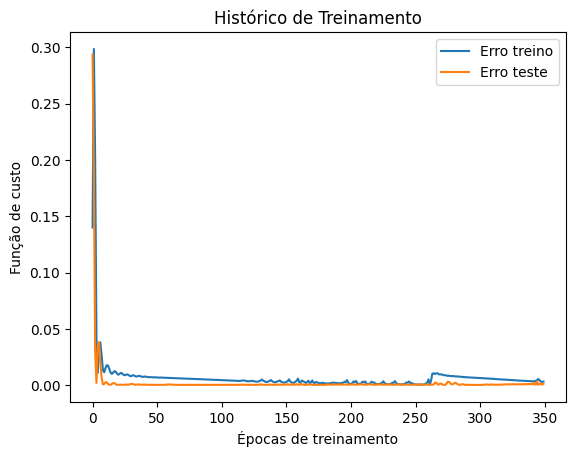

In [ ]:
# Plotando gráfico do histórico de treinamento


plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

In [ ]:
for layer in modelo.layers:
    weights = layer.get_weights()
    print(weights)


[array([[ 5.58593869e-02, -5.02021238e-02, -9.12159681e-02,
        -2.19488844e-01,  1.11793779e-01,  1.55093238e-01,
         3.33990455e-01, -1.34402648e-01, -4.35896814e-02,
         1.39463861e-02, -2.10108265e-01, -2.27897614e-01,
         5.35502955e-02, -4.45729494e-03, -3.67482901e-02,
         3.07013717e-04,  7.45348334e-02,  7.88901746e-02,
         8.37187767e-02,  1.49524864e-02,  2.89007545e-01,
        -1.22233726e-01,  3.12087357e-01, -6.41770065e-02,
        -2.48147517e-01, -1.44949257e-01,  2.10150890e-02,
         1.79809034e-02,  1.29274428e-01,  1.73801780e-01,
        -5.87715805e-02,  2.04614043e-01, -2.35767767e-01,
        -3.09564710e-01,  2.72946000e-01, -6.04472775e-03,
        -1.93179786e-01, -2.97384769e-01, -3.15802097e-02,
        -4.09883969e-02],
       [ 1.62562490e-01,  1.79477960e-01,  2.80508876e-01,
        -3.54792088e-01,  3.21595967e-01,  3.42169106e-01,
         2.93226302e-01,  2.79828429e-01,  3.33355427e-01,
         4.53780852e-02,  3.6